In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml('mnist_784', version=1, return_X_y=False)

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [10]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
mnist.target[10000]

'3'

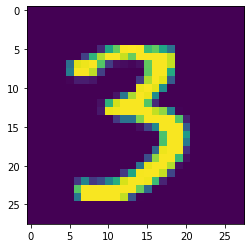

In [55]:
plt.imshow(mnist.data[10000].reshape((28,28)),interpolation="nearest")

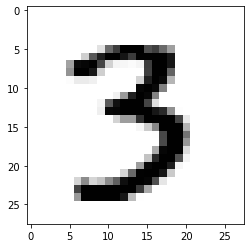

In [56]:
plt.imshow(mnist.data[10000].reshape((28,28)),cmap=plt.cm.gray_r,interpolation="nearest")

In [13]:
from sklearn.utils import resample

In [14]:
data,target=resample(mnist.data,mnist.target,n_samples=5000) 
#c'est la même chose que précédement pour faire un échantillon de 500, mais là, on n'est sûr de ne pas avoir de redite

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,train_size=0.8) #on partage en train set et test set

In [17]:
xtrain.shape

(4000, 784)

In [18]:
xtest.shape

(1000, 784)

In [19]:
ytrain.shape

(4000,)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=3)

In [22]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [26]:
ypred=model.predict(xtest)

y vrai est un : 


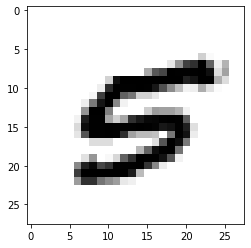

 et le modèle a prédit un :  5


In [64]:
apredire=502
print("y vrai est un : ")
plt.imshow(xtest[apredire].reshape((28,28)),cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(" et le modèle a prédit un : ",ypred[apredire])

In [23]:
model.score(xtest,ytest)

0.939

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(ytest, ypred)

In [33]:
def plot_confusion_matrix(ytest, ypred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    title = 'Normalized confusion matrix'
        
    # Compute confusion matrix
    cm = confusion_matrix(ytest, ypred)
    

    fig, ax = plt.subplots()
    im = ax.imshow(cm,interpolation='nearest',cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]+2),
           yticks=np.arange(cm.shape[0]+2),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(0,cm.shape[0]):
        for j in range(0,cm.shape[1]):
            ax.text(j+1, i+1, format(cm[i, j],'2d'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.text(10, 10, format(cm[9, 9],'2d'),ha="center", va="center",
                    color="black" )
    fig.tight_layout()
    return ax

In [34]:
class_names = ['-','0','1','2','3','4','5','6','7','8','9','-']

<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

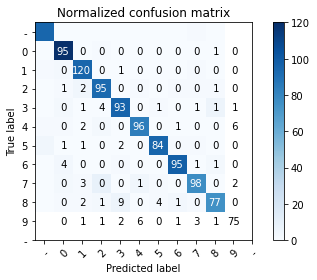

In [36]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(ytest, ypred, classes=class_names,
                      title='Confusion matrix, without normalization \n')

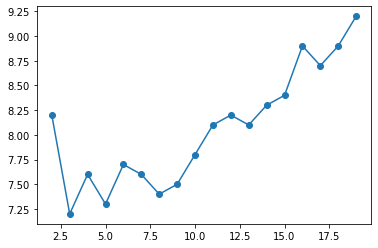

In [39]:
errors=[]
for k in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1-knn.fit(xtrain,ytrain).score(xtest,ytest)))
plt.plot(range(2,20),errors,'o-')
plt.show()

In [40]:
# On récupère le classifieur le plus performant odnc ici c'est 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))



In [50]:
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

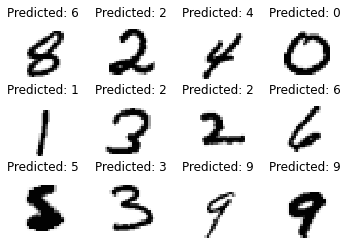

In [42]:
# On affiche les images avec la prédiction associée
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %s' % predicted[value])

plt.show()

In [43]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

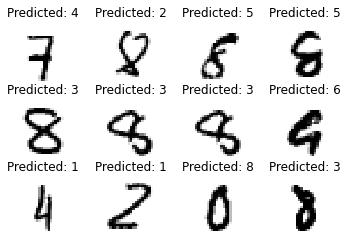

In [44]:
# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %s' % misclass_predicted[value])

plt.show()